In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import mplcursors


class plotData:

    def __init__(self, filename):
        
        self.filename = filename
        self.df = pd.read_csv(filename)
#         print(self.filename)
#         print(self.df.tail())
    
    def plot(self, Columname, From, To, Color):
        
        self.Columname = Columname
        self.From = From
        self.To  = To
        self.Color = Color
            
        if self.To ==  0:
            self.To = None
        
        ax = plt.figure(figsize =(10, 4))
        ax = self.df[self.Columname][self.From:self.To].plot(color  = self.Color)
        plt.ylabel(self.Columname)
        
        crs = mplcursors.cursor(ax,hover=True)
        crs.connect("add", lambda sel: sel.annotation.set_text(
                'Point {},{}'.format(sel.target[0], sel.target[1])))
        
        plt.show()
    

class extractData:
    
    def __init__(self, filename,  firstsample, interval, new_head):

        self.filename = filename
        self.firstsample = firstsample
        self.interval = interval
        self.new_head = new_head
        
        file = './data/filtered_data.csv'
        if(os.path.exists(file) and os.path.isfile(file)):
            os.remove(file)
        
        df = pd.read_csv(filename)
        
        sample_nos = int(df[df.columns[0]].count()/self.interval)
        print(sample_nos)
        y = 0
        for i in range(sample_nos):
            new_df=df[(y-1):y]
            new_df.to_csv('filtered_data.csv', mode='a', index=False, header=False)
            y=y+self.interval
        
    def getFilteredData(self):
        df1 = pd.read_csv("filtered_data.csv",names=self.new_head) 
        file = 'filtered_data.csv'
        os.remove(file)
        new_df = df1
        new_df.to_csv('filtered_data.csv', mode='a', index=False, header=True)
        return df1

34


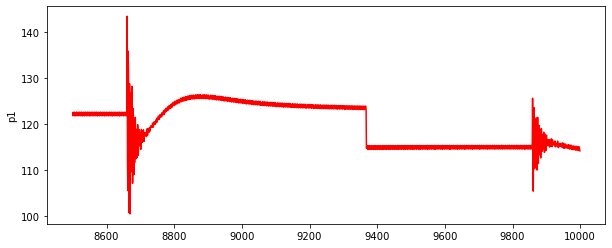

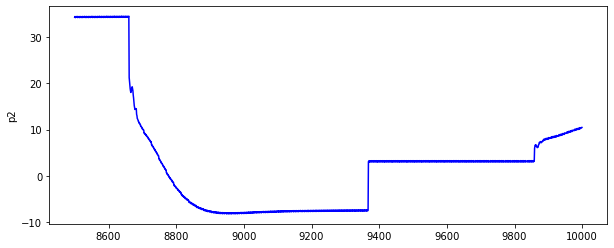

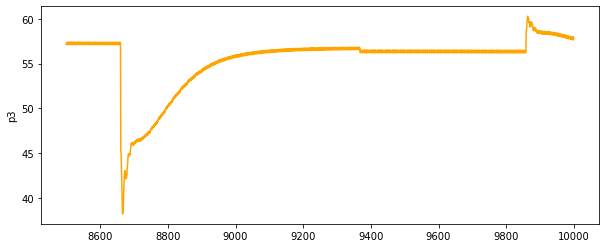

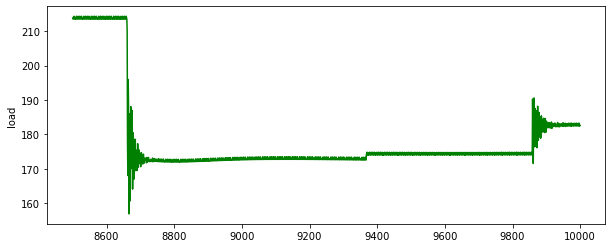

In [12]:
From = 0
to = 1000
p1 = plotData("./data/filtered_data.csv")
p1.plot("p1",From,to, "red")
# p2.plot("p1",From,to, "red")
p1.plot("p2",From,to, "blue")
# p2.plot("p2",From,to, "blue")
p1.plot("p3",From,to, "orange")
# p2.plot("p3",From,to, "orange")
p1.plot("load",From,to, "green")
# p2.plot("load",From,to, "green")